In [1]:
import numpy as np
from scipy.optimize import minimize
import cvxpy as cp
import scipy as scipy
import cvxopt as cvxopt
import matplotlib.pyplot as plt

In [2]:
# c = composite score
# x_equ = equity score
# x_exc = excellence score
# x_eff = efficiency score

# ------------
# The data we have™

# assume composite scores as presented to the parents are actually 100 * normdist(value) where value
# is the *actual* composite score generated from the linear combination 0.5 * equity score +
# 0.25 * excellence score + 0.25 * efficiency score

c_values = np.array([
  -1.074496976,
  -0.3985836646,
  -1.202422179,
  -0.480882516,
  -0.5255513022,
  0.0007519885541,
  -0.4097354803,
  -0.02256156841,
  -0.6603955924,
  -0.004511946208,
  -0.4110989225,
  -0.8302454899,
  -1.350049828,
  -0.4761044039,
  -0.4421232789,
  -0.6261752491,
  -1.051563199,
  -0.2422325171,
  -0.02732564848,
  -0.9944578841,
  -0.03133798205,
  -0.9303304822,
  -1.16061132,
  -0.2139321094,
  -0.718904116,
  -0.5455140798,
  -0.3398094907,
  0.01403757937,
  -0.5175102729,
  -0.2970871163,
  -0.8628862699,
  -0.5023803486,
  -0.7891916518,
  -0.3445934905,
  -0.4393609736,
  -0.239652063,
  -0.2624169578,
  -0.0002506628304,
  -0.7153383447,
  -0.1441272335,
  -1.08572653,
  -0.8473501158,
  -1.011034329,
  -0.6597722405,
  -0.7854325535,
  -0.4415705486,
  -0.2502422673,
  0.1206099341,
  -1.087083296,
  -0.6613311018,
  -0.6520018176,
  -0.7050164483,
  -0.48172685,
  -1.06472587,
  -0.528143127,
  -0.6912634442,
  -0.6209994277,
  -0.541446303,
  -0.7312933356,
  -0.04914969549,
  -0.5819505353,
  -0.9956916271,
  0.04689112698,
  -0.4127360629,
  -0.4646250366,
  -1.027893347,
  0.2257446866,
  -0.002506630902,
  -0.05517380219,
  -0.5571865188,
  -0.5295845631,
  -0.3589934354,
  0.02908098648,
  0.673545991,
  0.0376082877,
  0.1001817935,
  -0.2650122821,
  0.3065314995,
  0.5232504184,
  -0.07904101486,
  1.397045132,
  -0.1616264843,
  -0.3791183234,
  0.3078453653,
  1.338909919,
  -0.1464071288,
  0.122125029,
  -0.3366244794,
  0.1436206922,
  0.477227684,
  0.6100933075,
  -0.2095742227,
  0.1160662962,
  -0.5899860536,
  -0.3360939769,
  -0.2306329076,
  -0.4083727993,
  -0.6710322265,
  -0.8923600067,
  0.4357749781,
])

# we're given the *rank* for each school

x_equ_ranks = np.array([6,32,4,70,49,33,41,27,38,44,71,45,5,62,30,35,10,57,91,43,47,11,0,63,7,23,36,55,94,84,1,16,9,17,37,34,54,64,14,42,24,68,2,40,20,59,39,61,15,29,46,8,13,3,18,53,74,19,58,50,22,12,73,48,76,79,99,26,56,67,66,65,52,78,87,96,51,98,97,72,100,82,89,83,60,95,93,92,77,75,81,85,86,90,21,31,80,25,28,69])
x_exc_ranks = np.array([74,79,75,18,39,94,48,93,6,99,19,4,55,21,50,30,71,47,40,8,69,83,84,42,96,59,54,66,12,20,86,89,73,97,28,49,51,85,81,57,56,13,100,14,82,37,46,92,64,72,41,90,95,91,77,38,15,70,16,67,65,61,53,29,10,1,27,63,23,3,9,17,44,78,31,25,32,24,60,45,58,7,26,22,88,35,33,11,68,90,52,5,43,0,76,87,2,62,34,98])
x_eff_ranks = np.array([35,31,40,17,25,88,36,93,80,34,22,44,56,24,81,54,29,42,16,18,76,27,68,53,48,74,55,77,0,15,90,52,71,70,83,91,39,19,41,86,3,2,30,65,10,21,82,33,14,11,12,60,63,32,58,5,7,72,13,75,46,38,64,69,23,4,28,99,95,47,37,49,94,96,67,57,87,89,85,50,62,84,1,97,100,6,59,9,51,92,98,73,66,20,79,61,45,26,43,78])

n = len(c_values)

In [3]:
np.argsort(x_equ_ranks)

array([22, 30, 42, 53,  2, 12,  0, 24, 51, 32, 16, 21, 61, 52, 38, 48, 31,
       33, 54, 57, 44, 94, 60, 25, 40, 97, 67,  7, 98, 49, 14, 95,  1,  5,
       35, 15, 26, 34,  8, 46, 43,  6, 39, 19,  9, 11, 50, 20, 63,  4, 59,
       76, 72, 55, 36, 27, 68, 17, 58, 45, 84, 47, 13, 23, 37, 71, 70, 69,
       41, 99,  3, 10, 79, 62, 56, 89, 64, 88, 73, 65, 96, 90, 81, 83, 29,
       91, 92, 74, 82, 93, 18, 87, 86, 28, 85, 75, 78, 77, 66, 80])

In [4]:
# fix the issue with the gap in the ranks
x_equ_gap_loc = np.argmax(np.diff(np.sort(x_equ_ranks))) # where does the gap occur
x_equ_ranks = np.where(
    x_equ_ranks <= x_equ_gap_loc,
    x_equ_ranks,
    x_equ_ranks - 1,
)

x_exc_gap_loc = np.argmax(np.diff(np.sort(x_exc_ranks)))  # where does the gap occur
x_exc_ranks = np.where(
    x_exc_ranks <= x_exc_gap_loc,
    x_exc_ranks,
    x_exc_ranks - 1,
)

x_eff_gap_loc = np.argmax(np.diff(np.sort(x_eff_ranks)))  # where does the gap occur
x_eff_ranks = np.where(
    x_eff_ranks <= x_eff_gap_loc,
    x_eff_ranks,
    x_eff_ranks - 1,
)

In [5]:
x_equ = cp.Variable(shape=n)
x_exc = cp.Variable(shape=n)
x_eff = cp.Variable(shape=n)

In [6]:
# quadratic objective function
obj = cp.Minimize(
    0.5 * cp.sum_squares(0.5 * x_equ + 0.25 * x_exc + 0.25 * x_eff - c_values)
)

# inequality constraints
# eg: x_equ[6] >= x_equ[32] ->  -G[0, 6] + G_equ[0, 32] <= h_equ[0] = epsilon
G_equ = np.zeros((n - 1, n))
x_equ_ranks_idx = np.argsort(x_equ_ranks)[::-1]
for row, (col1, col2) in enumerate(zip(x_equ_ranks_idx[:-1], x_equ_ranks_idx[1:])):
    G_equ[row, col1] = -1
    G_equ[row, col2] = 1

G_exc = np.zeros((n - 1, n))
x_exc_ranks_idx = np.argsort(x_exc_ranks)[::-1]
for row, (col1, col2) in enumerate(zip(x_exc_ranks_idx[:-1], x_exc_ranks_idx[1:])):
    G_exc[row, col1] = -1
    G_exc[row, col2] = 1

G_eff = np.zeros((n - 1, n))
x_eff_ranks_idx = np.argsort(x_eff_ranks)[::-1]
for row, (col1, col2) in enumerate(zip(x_eff_ranks_idx[:-1], x_eff_ranks_idx[1:])):
    G_eff[row, col1] = -1
    G_eff[row, col2] = 1

In [7]:
# CVX Problem

epsilon = -0.00001
h = np.full(n - 1, epsilon)

prob = cp.Problem(
    obj,
    [
        G_equ @ x_equ <= h,
        G_exc @ x_exc <= h,
        G_eff @ x_eff <= h,
    ],
)

prob.solve()
print("\nThe optimal value is", prob.value)


The optimal value is 8.876317614151279e-14


In [8]:
prob.status

'optimal'

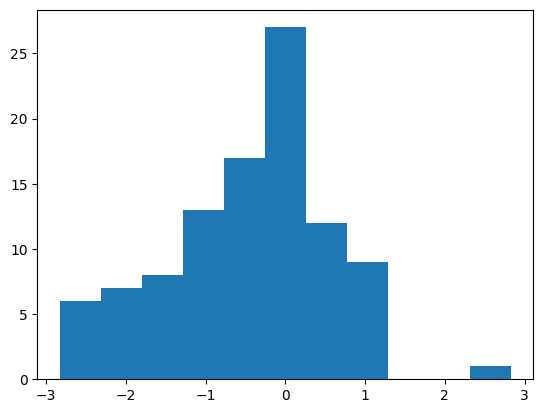

In [9]:
plt.hist(x_equ.value, bins="auto");

(array([ 2.,  7.,  8., 22., 10., 22., 13., 16.]),
 array([-2.94115118, -2.37680502, -1.81245886, -1.24811269, -0.68376653,
        -0.11942037,  0.44492579,  1.00927195,  1.57361811]),
 <BarContainer object of 8 artists>)

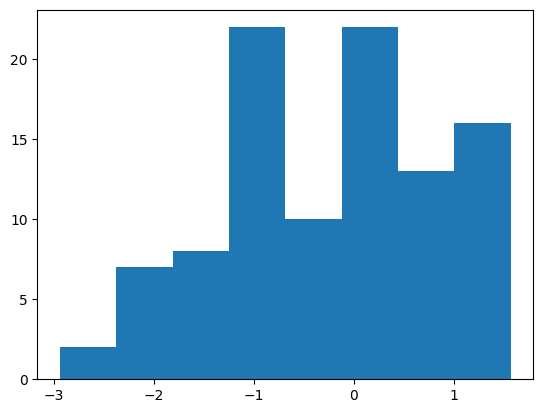

In [10]:
plt.hist(x_exc.value, bins="auto")

(array([ 5.,  2.,  7.,  6., 20., 21., 17., 14.,  1.,  1.,  3.,  1.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-2.06560365, -1.73918463, -1.41276561, -1.08634659, -0.75992757,
        -0.43350855, -0.10708953,  0.21932949,  0.54574851,  0.87216753,
         1.19858655,  1.52500557,  1.85142459,  2.17784361,  2.50426263,
         2.83068165,  3.15710067,  3.48351969,  3.80993871,  4.13635773,
         4.46277675]),
 <BarContainer object of 20 artists>)

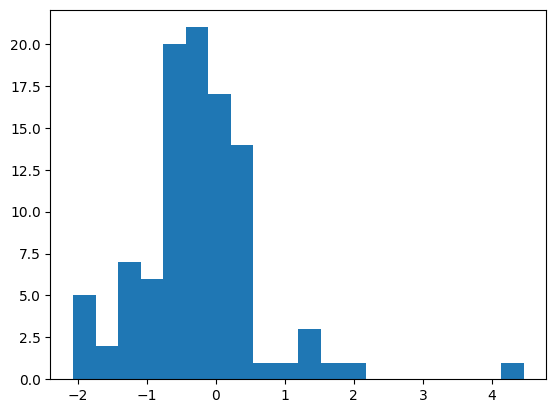

In [11]:
plt.hist(x_eff.value, bins="auto")

In [12]:
0.5 * x_equ.value + 0.25 * x_exc.value + 0.25 * x_eff.value - c_values

array([-7.91599937e-08, -2.80564125e-08, -8.24806075e-08, -4.23012202e-08,
       -3.85176026e-08,  2.62800127e-09, -3.28296337e-08,  1.44941491e-09,
       -4.99907032e-08,  1.20414890e-09, -3.75110569e-08, -5.73978707e-08,
       -8.45813979e-08, -3.43297722e-08, -3.35127632e-08, -4.65520723e-08,
       -7.18246262e-08, -1.45520182e-08, -6.80160541e-09, -6.86442742e-08,
       -2.07589230e-09, -6.35261010e-08, -7.31297791e-08, -9.35653208e-09,
       -5.93344864e-08, -3.78871559e-08, -2.64218178e-08,  4.94310464e-09,
       -3.16395611e-08, -2.72738177e-08, -6.03960375e-08, -3.84193299e-08,
       -6.01956323e-08, -2.74119776e-08, -3.45309163e-08, -1.86116807e-08,
       -1.88341914e-08,  1.83571798e-09, -5.29500952e-08, -6.43673986e-09,
       -7.26206828e-08, -5.72071673e-08, -7.79832143e-08, -4.32178815e-08,
       -5.67824028e-08, -2.60055630e-08, -2.06126884e-08,  1.79063694e-08,
       -7.30307470e-08, -5.02168837e-08, -4.74180732e-08, -5.13357763e-08,
       -3.62858485e-08, -